In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [2]:
df=pd.read_csv("/content/drive/MyDrive/heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


<Axes: xlabel='sex'>

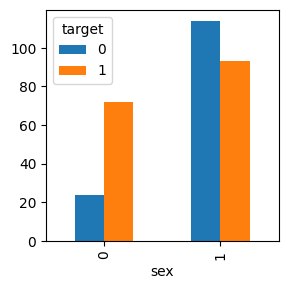

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(3,3))

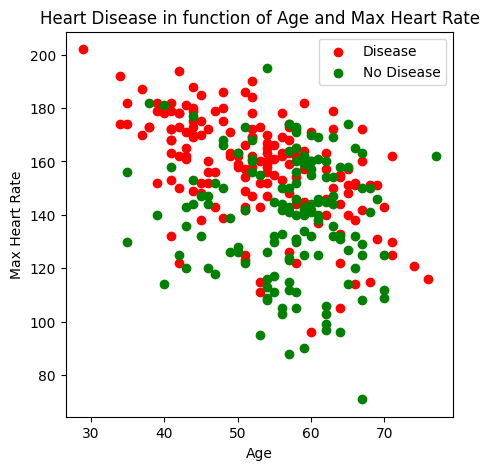

In [9]:
# Create another figure
plt.figure(figsize=(5,5))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [10]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


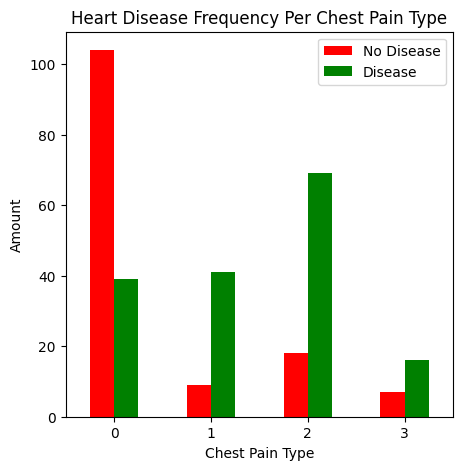

In [11]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(5,5),color=["red","green"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

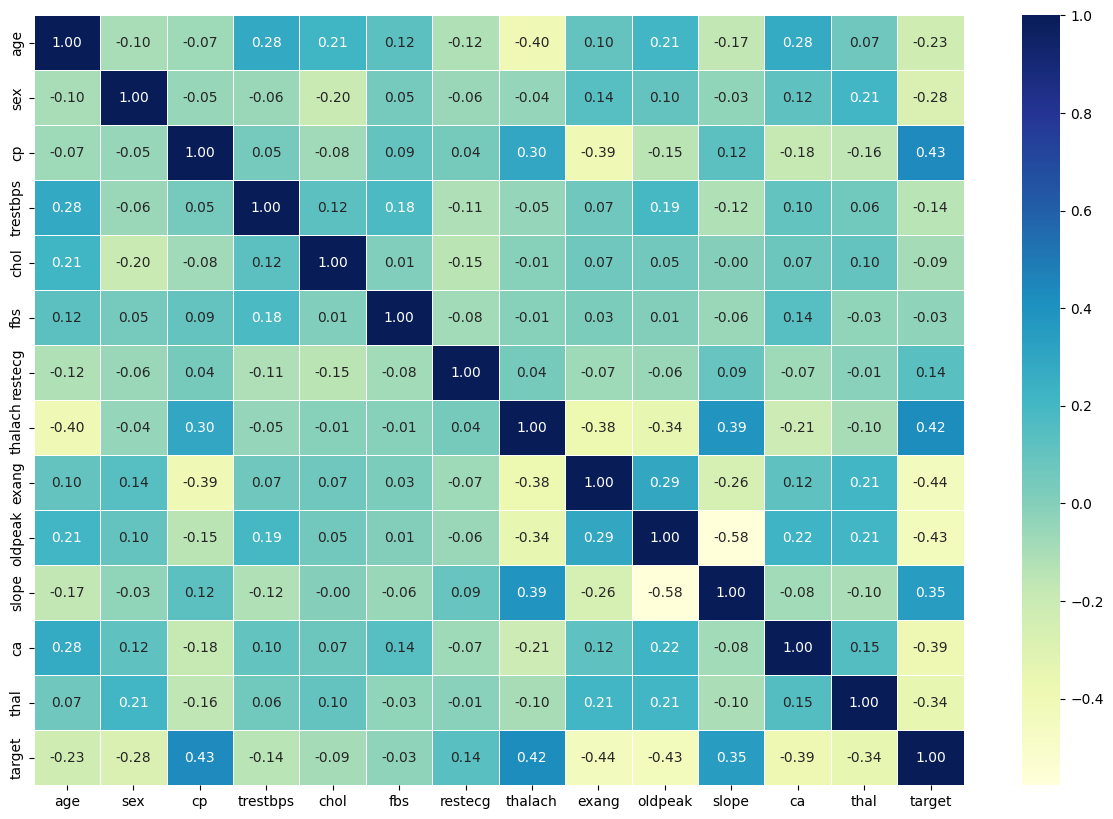

In [12]:
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [13]:
from re import X
# Modelling

X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)


In [14]:
models={"Logistic Regression": LogisticRegression(),
        "K Neighbors": KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()
}



In [15]:
def fit_and_score(models,X_train,X_test,y_train,y_test):

  model_scores={}

  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)

  return model_scores


In [16]:
# use the function for fit and evaluation

model_scores= fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8131868131868132,
 'K Neighbors': 0.6593406593406593,
 'Random Forest': 0.8241758241758241}

In [17]:
# best performance: random forest


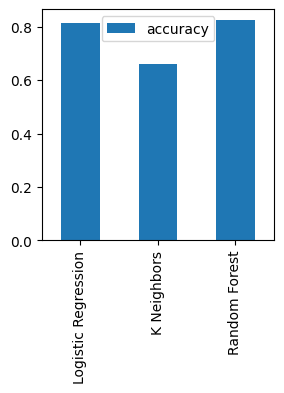

In [18]:
# comparison

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(3,3));

### check other features

Hypyterparameter tuning

Feature importance

Confusion matrix

Cross-validation

Precision

Recall

F1 score

Classification report

ROC curve

Area under the curve (AUC)

In [19]:
# hyperparameter tuning

train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:

  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))



In [20]:
train_scores

[1.0,
 0.7877358490566038,
 0.7783018867924528,
 0.7547169811320755,
 0.7688679245283019,
 0.7594339622641509,
 0.7452830188679245,
 0.7216981132075472,
 0.7216981132075472,
 0.6933962264150944,
 0.7075471698113207,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6886792452830188,
 0.6745283018867925,
 0.6981132075471698,
 0.6933962264150944]

In [21]:
test_scores

[0.5934065934065934,
 0.6153846153846154,
 0.6263736263736264,
 0.6373626373626373,
 0.6593406593406593,
 0.6483516483516484,
 0.6703296703296703,
 0.6593406593406593,
 0.6593406593406593,
 0.6923076923076923,
 0.6703296703296703,
 0.6593406593406593,
 0.6703296703296703,
 0.6153846153846154,
 0.6483516483516484,
 0.6593406593406593,
 0.6813186813186813,
 0.6703296703296703,
 0.6703296703296703,
 0.6813186813186813]

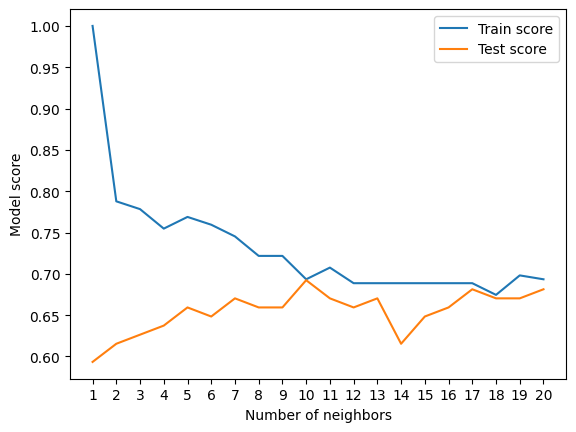

In [22]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [24]:
# hyperparameter tuning with RandomSearchCV

# grid for log reg
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [26]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [28]:
rs_log_reg.score(X_test, y_test)

0.8461538461538461

In [29]:

np.random.seed(42)


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)


rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [32]:

rs_rf.score(X_test, y_test)

0.8351648351648352

In [34]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [35]:
y_preds = gs_log_reg.predict(X_test)

In [36]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: target, Length: 91, dtype: int64

In [37]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))


[[32  9]
 [ 8 42]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [48]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [52]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [53]:
 cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [54]:
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [55]:
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

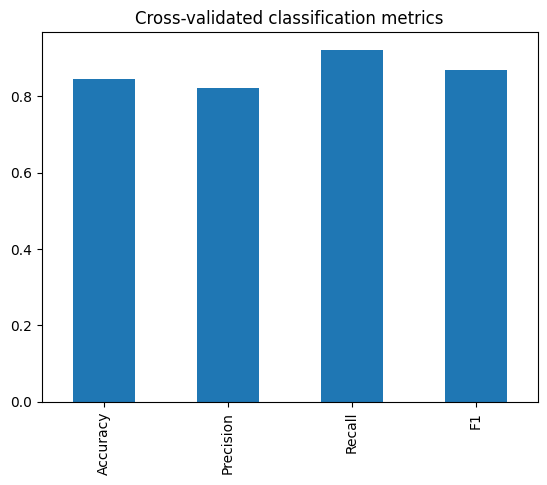

In [57]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [58]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [59]:
clf.coef_

array([[ 0.00489311, -0.69408935,  0.65853935, -0.00603896, -0.00136516,
         0.1349068 ,  0.33602435,  0.01997685, -0.64135661, -0.48005097,
         0.50356553, -0.80427996, -0.83119874]])

In [60]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0048931081725927805,
 'sex': -0.6940893454700954,
 'cp': 0.6585393461089115,
 'trestbps': -0.006038959547020836,
 'chol': -0.001365157896307734,
 'fbs': 0.13490679972736302,
 'restecg': 0.3360243528312487,
 'thalach': 0.019976854088717775,
 'exang': -0.641356609461534,
 'oldpeak': -0.4800509669055414,
 'slope': 0.5035655264702217,
 'ca': -0.804279956282005,
 'thal': -0.8311987353518596}

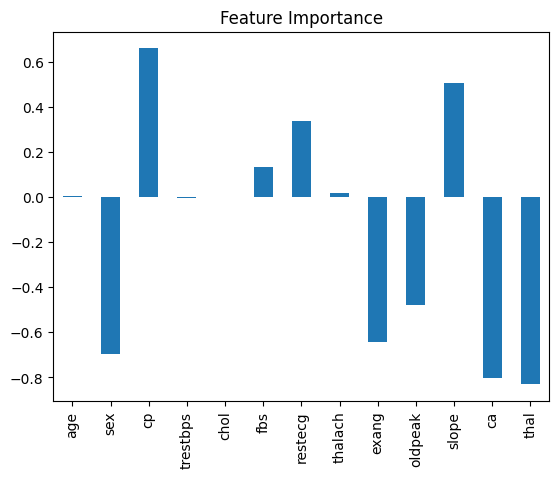

In [61]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);